# Investigation into the effects of Prototype ordering

A cycamore::ManagerInst is used to deploy reactors in order to meet a flat demand for 
energy -- 91.18 GWe-yr. It was observed that the order the prototypes were listed 
in the institution affects the number of each prototype built, with preferential 
building of prototypes listed first. This notebook looks at the results of each 
possible combination of prototype ordering. The prototypes in question are: Xe-100, MMR, 
and VOYGR. The scenarios modeled are defined as:
* 1: Xe-100, VOYGR, MMR
* 2: Xe-100, MMR, VOYGR
* 3: VOYGR, Xe-100, MMR
* 4: VOYGR, MMR, Xe-100
* 5: MMR, VOYGR, Xe-100
* 6: MMR, Xe-100, VOYGR

Each of these scenarios were run twice: with all prototypes deployed by the same institution (s#), and with each prototype deployed by a different institution (m#). In both cases, the cycamore::ManagerInst is used to deploy the prototypes. 

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cymetric as cym
sys.path.insert(0, '../../../scripts/')
import transition_metrics as tm

In [2]:
def get_prototype_numbers(out_file, prototypes):
    '''
    This function get the Agents metrics for 
    a give output file and get the length of that
    dataframe for each specified prototype
    
    Parameters:
    -----------
    out_file: str
        name of output file to read
    prototypes: list, str
        list of strings of the name(s) of prototypes
        
    Returns:
    --------
    prototype_numbers: dict
        dictionary of the number of prototypes deployed, the 
        prototype name are the keys of the dictionary
    '''
    evaler = tm.get_metrics(out_file)
    agents = evaler.eval('Agents')
    prototype_numbers = {}
    prototype_numbers['total'] = 0
    for prototype in prototypes:
        prototype_agents = agents.loc[agents['Prototype'] == prototype]
        prototype_numbers[prototype] = len(prototype_agents)
        prototype_numbers['total'] += prototype_numbers[prototype]
    return prototype_numbers

In [3]:
out_files = {'s1_out':'s1_output.sqlite', 's2_out':'s2_output.sqlite', 
            's3_out':'s3_output.sqlite', 's4_out':'s4_output.sqlite',
            's5_out':'s5_output.sqlite', 's6_out':'s6_output.sqlite',
            'm1_out':'s1_multiple.sqlite', 'm2_out':'s2_multiple.sqlite',
            'm3_out':'s3_multiple.sqlite', 'm4_out':'s4_multiple.sqlite',
            'm5_out':'s5_multiple.sqlite', 'm6_out':'s6_multiple.sqlite',
            }
reactor_numbers = {'s1_reactors':'', 's2_reactors':'', 's3_reactors':'',
            's4_reactors':'', 's5_reactors':'', 's6_reactors':'',
            'm1_reactors':'', 'm2_reactors':'', 'm3_reactors':'',
            'm4_reactors':'', 'm5_reactors':'', 'm6_reactors':''}
reactor_totals = {'s1_reactors':'', 's2_reactors':'', 's3_reactors':'',
            's4_reactors':'', 's5_reactors':'', 's6_reactors':'',
            'm1_reactors':'', 'm2_reactors':'', 'm3_reactors':'',
            'm4_reactors':'', 'm5_reactors':'', 'm6_reactors':''}

non_lwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'Xe-100', 'MMR', 'VOYGR', 'VOYGR_Inst', 'MMR_Inst', 'Xe_Inst']

prototypes = ['MMR', 'VOYGR', 'Xe-100']
for key in out_files:
    scenario_reactors = key[:2] + '_reactors'
    reactor_numbers[scenario_reactors] = get_prototype_numbers(out_files[key], prototypes)
    reactor_totals[scenario_reactors] = tm.get_prototype_totals(out_files[key], non_lwr, prototypes)

In [4]:
reactor_numbers

{'s1_reactors': {'total': 2033, 'MMR': 722, 'VOYGR': 516, 'Xe-100': 795},
 's2_reactors': {'total': 1913, 'MMR': 782, 'VOYGR': 0, 'Xe-100': 1131},
 's3_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 's4_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 's5_reactors': {'total': 7347, 'MMR': 7101, 'VOYGR': 0, 'Xe-100': 246},
 's6_reactors': {'total': 7347, 'MMR': 7101, 'VOYGR': 0, 'Xe-100': 246},
 'm1_reactors': {'total': 1788, 'MMR': 686, 'VOYGR': 2, 'Xe-100': 1100},
 'm2_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 'm3_reactors': {'total': 1894, 'MMR': 686, 'VOYGR': 320, 'Xe-100': 888},
 'm4_reactors': {'total': 1788, 'MMR': 686, 'VOYGR': 2, 'Xe-100': 1100},
 'm5_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112},
 'm6_reactors': {'total': 2754, 'MMR': 1276, 'VOYGR': 1366, 'Xe-100': 112}}

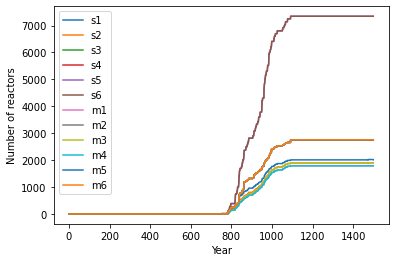

In [5]:
for key in reactor_totals:
    plt.plot(reactor_totals[key]['Time'], reactor_totals[key]['advrx_total'], label=key[:2])
plt.xlabel('Year')
plt.ylabel('Number of reactors')
plt.legend()
plt.savefig('reactor_totals.png')

The above figure demonstrates less variation in the number of reactors deployed when 
multiple institutions are used to deploy the reactor prototypes, but it does not 
remove the variation and preferences. 

In [6]:
energy = {'s1_energy':'', 's2_energy':'', 's3_energy':'',
          's4_energy':'', 's5_energy':'', 's6_energy':'',
          'm1_energy':'', 'm2_energy':'', 'm3_energy':'',
          'm4_energy':'', 'm5_energy':'', 'm6_energy':''}
for key in out_files:
    energy_key = key[:2] + '_energy'
    energy[energy_key]= {}
    energy[energy_key]['Annual'] = tm.get_annual_electricity(out_files[key])
    energy[energy_key]['Monthly'] = tm.get_monthly_electricity(out_files[key])

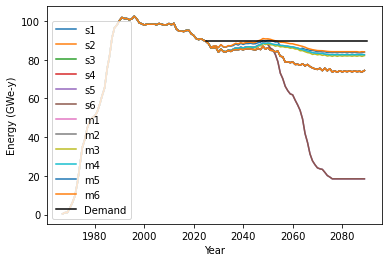

In [7]:
for key in energy:
    plt.plot(energy[key]['Annual']['Year'], energy[key]['Annual']['Energy'], label=key[:2])
time = np.linspace(2025, 2090, 50)
plt.plot(time, np.repeat(89.456, 50), 'k', label='Demand')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('annual_energy.png')

The above figure shows that the variation in the reactor prototypes 
deployed affects the energy supplied in the simulation, with some 
scenarios meeting the demand better than others. Therefore, not all 
methods to order the prototypes will produce the same result if 
a power demand must be met. 

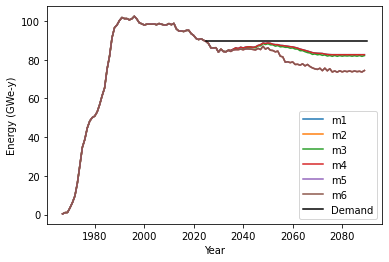

In [9]:
#Just looking at output from cases with multiple ManagerInsts
for key in ['m1_energy','m2_energy','m3_energy', 'm4_energy', 'm5_energy', 'm6_energy']:
    plt.plot(energy[key]['Annual']['Year'], energy[key]['Annual']['Energy'], label=key[:2])
time = np.linspace(2025, 2090, 50)
plt.plot(time, np.repeat(89.456, 50), 'k', label='Demand')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('annual_energy_multipleMI.png')   

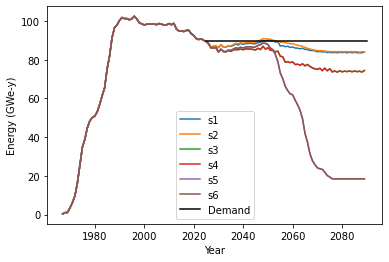

In [10]:
#Just lookign at output from cases with one ManagerInsts
for key in ['s1_energy','s2_energy','s3_energy', 's4_energy', 's5_energy', 's6_energy']:
    plt.plot(energy[key]['Annual']['Year'], energy[key]['Annual']['Energy'], label=key[:2])
time = np.linspace(2025, 2090, 50)
plt.plot(time, np.repeat(89.456, 50), 'k', label='Demand')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('annual_energy_singleMI.png')

## Conclusions
This analysis demonstrated that the ordering of the prototypes in the input file does impact the number of each prototype that are deployed, as well as the energy supplied in the scenario. Any ordering of the prototypes results in the demand not being fully met for the scenario. 

Using multiple institutions reduces the variability caused by the ordering of the prototypes, but does not remove it entirely. Using multiple institutions also does not result in the energy demand being met for the entire scenario.

## Looking into what the preference is

A simple toy problem is used for this analysis, consisting of a source, sink, two reactor 
prototypes (Reactor_type1, Reactor_type2), a ManagerInst, and a Growth Region. The Growth Region 
defines the power demand, a flat demand of 630 MWe at each time step, starting at time 
step 100. The ManagerInst deploys the two reactor prototypes to meet the power demand. 
Each reactor protoype has a lifetime of 100 time steps, and differ by their power cap: 
Reactor_type1 has a cap of 10 MW, and Reactor_type2 has a cap of 100 MW. 

The differences between the two scenarios examined here is the order the prototypes are 
listed in the ManagerInst. Based on the analysis above, this difference in the inputs 
will produce differences in the number of each prototype that are deployed. Scenario 1,
the Reactor_type1 is listed first, Scenario 2 the Reactor_type2 is listed first. Using a 
power demand of 630 MW: Scenario 1 should see 63 Reactor_type1's deployed and 0 Reactor_type2.
Scenario 2 should see 6 Reactor_type2 and 3 Reactor_type1 deployed. 

This deployment method preferentially deploys the first prototype listed until its deployment 
would cause a surplus in the commodity requested (in this case power). Then the next listed 
prototype is deployed until a surplus of the request commodity is experienced. 

In [11]:
out_files = {'1':'toy_problem_1.sqlite', '2':'toy_problem_2.sqlite'}
reactor_numbers = {'1_reactors':'', '2_reactors':''}
reactor_totals = {'s1_reactors':'', 's2_reactors':''}

prototypes = ['Reactor_type1', 'Reactor_type2']
for key in out_files:
    scenario_reactors = key + '_reactors'
    reactor_numbers[scenario_reactors] = get_prototype_numbers(out_files[key], prototypes)

In [12]:
reactor_numbers

{'1_reactors': {'total': 63, 'Reactor_type1': 63, 'Reactor_type2': 0},
 '2_reactors': {'total': 9, 'Reactor_type1': 3, 'Reactor_type2': 6}}

In [13]:
energy = {'1_energy':'', '2_energy':''}
for key in out_files:
    energy_key = key + '_energy'
    energy[energy_key]= {}
    energy[energy_key]['Annual'] = tm.get_annual_electricity(out_files[key])
    energy[energy_key]['Monthly'] = tm.get_monthly_electricity(out_files[key])

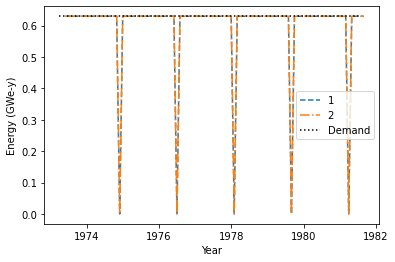

In [14]:
time = np.linspace(99, 199, 400)
demand = np.repeat(0.63, 400)
year = time/12 + 1965
lines = ['--','-.']
for key_int, key in enumerate(['1_energy', '2_energy']):
    plt.plot(energy[key]['Monthly']['Year'], energy[key]['Monthly']['Energy'], label=key[:1], linestyle=lines[key_int])
plt.plot(year, demand, 'k', label='Demand', linestyle=':')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
#plt.savefig('annual_energy_multipleMI.png')  

## Conclusions

This analysis showed the hypothesis to be correct with the number of each reactor 
prototype that are deployed, confirming that the expected preferential deployment 
of prototypes works as expected. 